L'objectif du projet est d'essayer de comprendre les facteurs qui influences le comportement alimentaires blablabla

## Chargement packages et données 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import re 
print(os.getcwd())

file_in1 = '../trash/merged_21_octobre.csv'
file_in2 = '../trash/choix_21_octobre_clean.csv'
#on recueillera tous les resultats d'analyses dans un fichier texte de sortie
file_out = ''

/home/hippo/Documents/Projet_MIChoCo/analyse


In [7]:
merged = pd.read_csv(file_in1, sep=",", encoding='latin-1')
choix = pd.read_csv(file_in2, sep=",", encoding='latin-1')

### Regroupement des lignes par groupe 

In [10]:
choix

,Unnamed: 0,torsades,feuilletÃ©saumonoseille,boeufbourguignon,kebab,risottocourgettes,pizzaraclette,faux-filet,pizzamerguezpoivrons,hamburger,...,fromageblancfruitsrouges,banane,mimolette,flancchocolat,faissellenatureflancchocolat,orange,yaourtnaturesucrÃ©yaourtauxfruits,pommegolden,kiwi,num_form
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2E8L
1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6Z9V
2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1P5N
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1L0F
4,4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6U1H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3L6Q
95,95,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1J5T
96,96,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4H1P
97,97,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3G0E


### Dernière transformation avant analyse

In [11]:
#choix = choix.drop("Horodateur", axis=1) # a enlever quand on prendra les matrices dans data_to_use
choix = choix.drop("Unnamed: 0", axis=1) # a enlever quand on prendra les matrices dans data_to_use
choix = choix.drop("num_form", axis=1)

In [12]:
#on transforme en numpy
choix = choix.to_numpy()

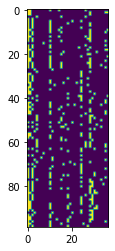

'\nTo DO \nfaire la meme chose après avoir agréger les personnes qui mange ensemble\n'

In [13]:

#on affiche la matrice des choix sous forme d'une image avec matplotlib
plt.imshow(choix)
plt.show()

'''
To DO 
faire la meme chose après avoir agréger les personnes qui mange ensemble
'''

### Definition d'une distance entre 2 plateaux qui soient meilleurs que la corrélation (utile ?)

In [14]:
# calcul de la distance moyenne entre deux choix d'individus, 
# il faut définir une métrique qui sera la proportion d'items choisis en commun sur le nombre d'item total dans les deux choix
''' 
attention, ici il faut qu'on discute de la métrique choisie
'''
def distance_proportion(choix1, choix2):
    #on compte le nombre de choix en commun 
    nb_item_commun = 0
    nb_item_total = 0
    for i in range(len(choix1)):
        nb_item_total += choix1[i] + choix2[i]
        if choix1[i] == choix2[i]:
            nb_item_commun += choix1[i] + choix2[i]         
    #on calcule la proportion de choix en commun 
    proportion = nb_item_commun / nb_item_total
    return proportion
# on compte le nombre de choix en commun 



In [17]:
#un exemple de porportion de plats choisis entre 2 individus 
distance_proportion(choix[1], choix[7])

0.4444444444444444

### Corrélation moyenne entre individus

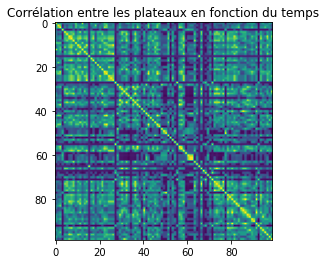

In [19]:
# on calcule la corrélation entre les individus 
corr_matrix = np.corrcoef(choix)
#titre de la figure
plt.title("Corrélation entre les plateaux en fonction du temps")
plt.imshow(corr_matrix)


... la corrélation augmente en fin de service car il y a moins de choix 
... on voit deja l'influence des choix des individus qui passe à peu près en même temps

In [54]:
#on calcule la distance moyenne d'un individu par rapport à tous les autres individus 

#on fait la moyenne de la matrice de corrélation
moy_corr = np.mean(corr_matrix)
print(moy_corr)

0.22719679864592693


### Corrélation moyenne des individus au sein d'un groupe 